In [ ]:
#https://www.kaggle.com/andrewmvd/cyberbullying-classification?select=cyberbullying_tweets.csv

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Imports

In [5]:
#Data processing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 200)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split

%matplotlib inline

#NLTK package for NLP
!pip install nltk

#import the nltk package
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize,sent_tokenize

#Packages for data cleaning
!pip install contractions
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import download as nltk_download
import random
import contractions
import numpy as np
import re

#Modeling 
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
!pip install hyperopt
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from numpy import asarray
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn import linear_model, svm, datasets, metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
data = pd.read_csv("/content/drive/MyDrive/Ensemble Learning_CyberBullies/cyberbullying_tweets.csv")

In [7]:
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying


In [ ]:
#Shall we do text cleaning before or after feature extraction?


In [8]:
#Drop duplicates
data.drop_duplicates(subset=['tweet_text'])

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will ...",ethnicity
47688,Turner did not withhold his disappointment. Turner called the court an “abominable conclave of negro hating demons” (with one exception) who “issued another decree that colored men and women must ...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&lt; FUCK.,ethnicity
47690,"Yea fuck you RT @therealexel: IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS.",ethnicity


#Text Cleaning

In [9]:
# downloading stopwords list
nltk_download('stopwords')
stop = stopwords.words('english')

#ADJUSTING DATA FORMAT

#Putting all tweets in a lower case format
data['tweet_text_clean'] = data['tweet_text'].str.lower()

#Removing numbers and punctuations
data['tweet_text_clean'] = data['tweet_text_clean'].apply(lambda x: re.sub(r'[!@#$(),\n"%^*?:;~`0-9]', ' ', x))
data['tweet_text_clean'] = data['tweet_text_clean'].apply(lambda x: re.sub(r'[[]]', ' ', x))

#Removing the contractions
data['tweet_text_clean'] = data['tweet_text_clean'].apply(lambda x: contractions.fix(x))


#Replacing stop words
pat = r'\b(?:{})\b'.format('|'.join(stop))
data['tweet_text_clean'] = data['tweet_text_clean'].str.replace(pat, '')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
data.head()

,tweet_text,cyberbullying_type,tweet_text_clean
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,words katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying,aussietv white mkr theblock imacelebrityau today sunrise studio neighbours wonderlandten etc
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,xochitlsuckkks classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying,jason_gio meh. p thanks heads concerned another angry dude twitter.
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying,rudhoeenglish isis account pretending kurdish account. like islam lies.


In [11]:
#Lemmatize the sentence

def lemmatizeSentence(sentence):
    lemmatizer = WordNetLemmatizer()
    token_words=word_tokenize(sentence) 
#we need to tokenize the sentence or else lemmatizing will return the entire sentence as is.
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(lemmatizer.lemmatize(word,pos="v"))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

In [12]:
data['tweet_text_clean'] = data['tweet_text_clean'].apply(lambda x: lemmatizeSentence(x))

#Data Exploration and visualisation

Exploring words and patterns associated with each type of cyberbullying.

In [10]:
data['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

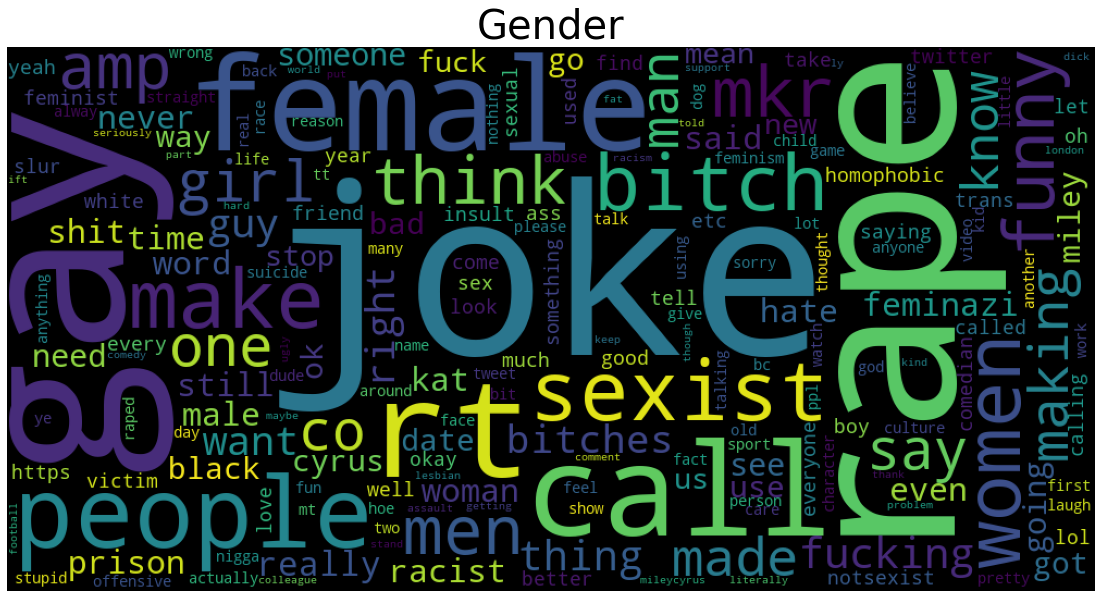

In [ ]:
#EDA for Gender
from wordcloud import WordCloud

plt.figure(figsize=(20,10))
subset1 = data[data['cyberbullying_type']=='gender']
text_gender = subset1.tweet_text_clean.values
cloud1=WordCloud(collocations=False,width=1000,height=500).generate(" ".join(text_gender))

plt.axis('off')
plt.title("Gender",fontsize=40)
plt.imshow(cloud1)

In [ ]:
#Bigrams - can be a good feature in model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def top_n_gram(corpus,ngram_range,n=None):
    vector = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    words = vector.transform(corpus)
    freq_words = words.sum(axis=0) 
    words_freq = [(word, freq_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

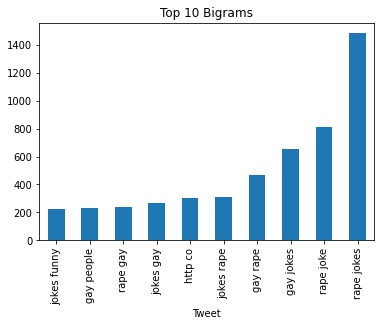

In [ ]:
bigrams = top_n_gram(text_gender,(2,2),10)

gender2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
gender2.groupby('Tweet').sum()['count'].sort_values(ascending=True).plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

(-0.5, 999.5, 499.5, -0.5)

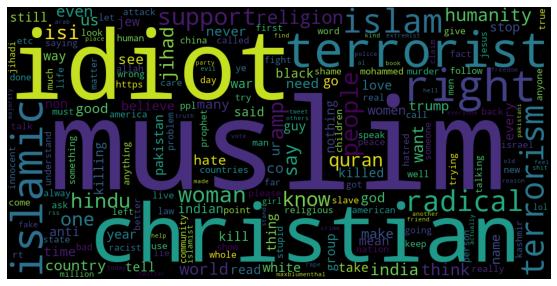

In [ ]:
#EDA for the religion

religion = data[data['cyberbullying_type']=='religion']
text_religion = religion.tweet_text_clean.values
wordcloud = WordCloud(collocations=False,width = 1000, height = 500).generate(" ".join(text_religion))
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

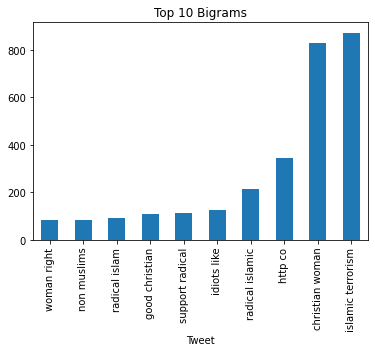

In [ ]:

bigrams = top_n_gram(text_religion,(2,2),10)

religion2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
religion2.groupby('Tweet').sum()['count'].sort_values(ascending=True).plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

(-0.5, 999.5, 499.5, -0.5)

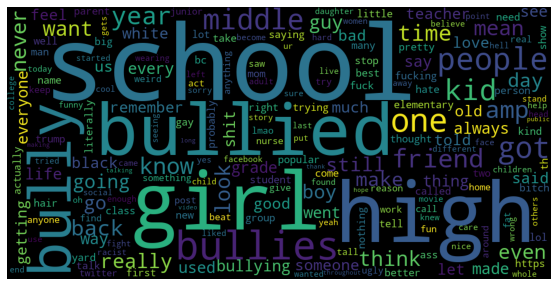

In [ ]:
#EDA for the age

age = data[data['cyberbullying_type']=='age']
text_age = age.tweet_text_clean.values
wordcloud = WordCloud(collocations=False,width = 1000, height = 500).generate(" ".join(text_age))
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

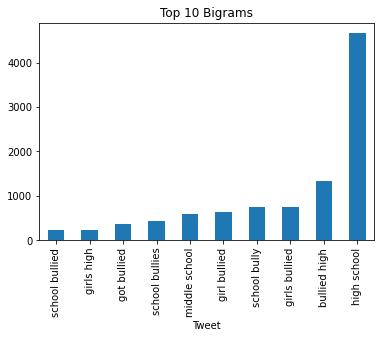

In [ ]:
bigrams = top_n_gram(text_age,(2,2),10)

age2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
age2.groupby('Tweet').sum()['count'].sort_values(ascending=True).plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

(-0.5, 999.5, 499.5, -0.5)

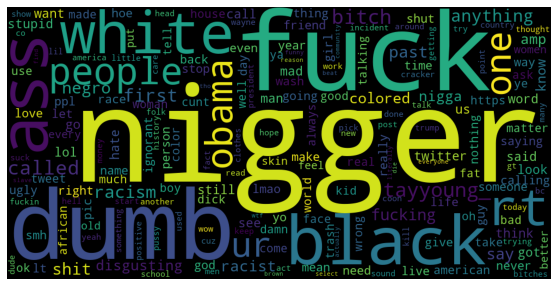

In [ ]:
#EDA for 'ethnicity'
ethnicity = data[data['cyberbullying_type']=='ethnicity']
text_ethnicity = ethnicity.tweet_text_clean.values
wordcloud = WordCloud(collocations=False,width = 1000, height = 500).generate(" ".join(text_ethnicity))
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

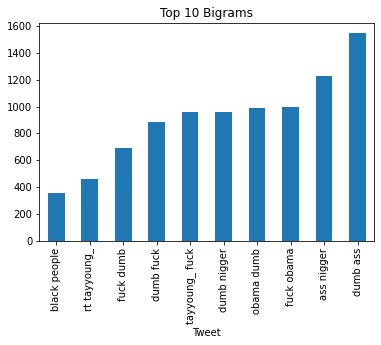

In [ ]:
bigrams = top_n_gram(text_ethnicity,(2,2),10)

ethnicity2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
ethnicity2.groupby('Tweet').sum()['count'].sort_values(ascending=True).plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

(-0.5, 999.5, 499.5, -0.5)

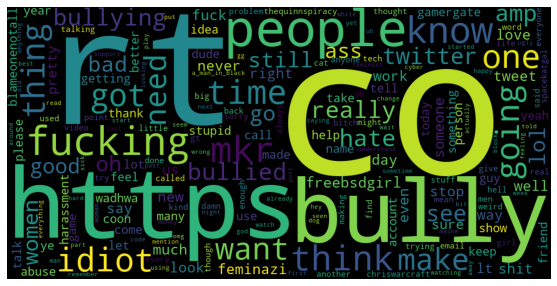

In [ ]:
#EDA for 'other_cyberbullying'
other_cyber = data[data['cyberbullying_type']=='other_cyberbullying']
text_other_cyber = other_cyber.tweet_text_clean.values
wordcloud = WordCloud(collocations=False,width = 1000, height = 500).generate(" ".join(text_other_cyber))
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

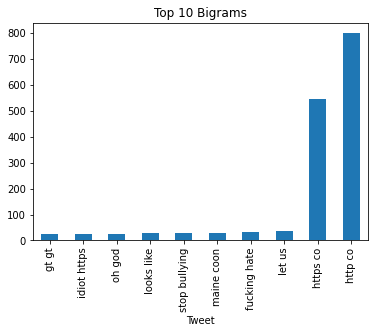

In [ ]:
bigrams = top_n_gram(text_other_cyber,(2,2),10)

ethnicity2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
ethnicity2.groupby('Tweet').sum()['count'].sort_values(ascending=True).plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

In [ ]:
# Duplication part - Karin

#Feature Extraction
Different techniques can be used here like TF-IDF, Word2vec (Skipgram Model), CBOW, Hugging face etc.

## Youjin

In [13]:
#Label Encoding the target variable

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data['target'] = labelencoder.fit_transform(data['cyberbullying_type'])

In [14]:
data.head()

,tweet_text,cyberbullying_type,tweet_text_clean,target
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,word katandandre food crapilicious mkr,3
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying,aussietv white mkr theblock imacelebrityau today sunrise studio neighbour wonderlandten etc,3
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,xochitlsuckkks classy whore red velvet cupcakes,3
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying,jason_gio meh . p thank head concern another angry dude twitter .,3
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying,rudhoeenglish isis account pretend kurdish account . like islam lie .,3


In [15]:
data['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

## Bag-of-Words

### 1. CountVectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
count_vectorizer = CountVectorizer(lowercase=True)
count_vectorizer.fit(data.tweet_text)

CountVectorizer()

In [17]:
X = count_vectorizer.transform(data.tweet_text)

In [18]:
y = data.cyberbullying_type.values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=555)

print(f"X train data has shape {X_train.shape} and their label's shape {y_train.shape}")
print(f"X test data has shape {X_test.shape} and their label's shape {y_test.shape}")

X train data has shape (38153, 60271) and their label's shape (38153,)
X test data has shape (9539, 60271) and their label's shape (9539,)


#### Toymodel: RF with countvectorizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=555)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=555)

In [ ]:
# with original text with count_vectorizer
from sklearn.metrics import f1_score
y_pred = rf.predict(X_test)
print('F1_score : %f' %(f1_score(y_pred, y_test, average = 'micro')))

F1_score : 0.813188


### 2. TF-IDF

In [20]:
import sklearn.feature_extraction.text

In [21]:
tfidf = sklearn.feature_extraction.text.TfidfVectorizer(tokenizer=word_tokenize, min_df=.0005, max_df=.8)

In [22]:
# with original text
X_tfidf = tfidf.fit_transform(data.tweet_text).toarray()
y_tfidf = data.cyberbullying_type.values

# # with cleaned text
# X = tfidf.fit_transform(data.tweet_text_clean).toarray()
# y = data.cyberbullying_type.values

# # with cleaned text & label-encoded target
# X = tfidf.fit_transform(data.tweet_text_clean).toarray()
# y = data.target.values

In [23]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_tfidf, y_tfidf, test_size=.2, random_state=555)

print(f"X train data has shape {X_train.shape} and their label's shape {y_train.shape}")
print(f"X test data has shape {X_test.shape} and their label's shape {y_test.shape}")

X train data has shape (38153, 60271) and their label's shape (38153,)
X test data has shape (9539, 60271) and their label's shape (9539,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=555)
rf.fit(X_train, y_train)

#### toymodel: RandomForest with TF-IDF

In [ ]:
# #with original text > TF-IDF
from sklearn.metrics import f1_score
y_pred = rf.predict(X_test)
print('F1_score : %f' %(f1_score(y_pred, y_test, average = 'micro')))

F1_score : 0.818534


In [ ]:
#with cleaned text > TF-IDF
# from sklearn.metrics import f1_score
# y_pred = rf.predict(X_test)
# print('F1_score : %f' %(f1_score(y_pred, y_test, average = 'micro')))

F1_score : 0.825558


In [ ]:
#with cleaned text & labeled target > TF-IDF
# from sklearn.metrics import f1_score
# y_pred = rf.predict(X_test)
# print('F1_score : %f' %(f1_score(y_pred, y_test, average = 'micro')))


F1_score : 0.825558


## Word2Vec : Done

In [25]:
pip install gensim==4.0.0

In [ ]:
# https://www.kaggle.com/ananyabioinfo/text-classification-using-word2vec

### Tweet Tokenizer

In [30]:
from gensim.models import TfidfModel
import gensim

In [26]:
import gensim
import pprint
from gensim import corpora
from gensim.utils import simple_preprocess
import numpy as np

doc_tokenized = [simple_preprocess(doc) for doc in data.tweet_text_clean]
dictionary = corpora.Dictionary()
BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized]
for doc in BoW_corpus:
   print([[dictionary[id], freq] for id, freq in doc])
import numpy as np


Streaming output truncated to the last 5000 lines.
[['like', 1], ['rt', 1], ['ass', 1], ['sick', 1], ['fight', 1], ['wit', 1], ['niggas', 1], ['playin', 1], ['leannalynn_', 1]]
[['white', 1], ['black', 1], ['call', 1], ['world', 1], ['women', 1], ['disgust', 1], ['never', 1], ['trash', 1], ['life', 1], ['bitch', 1], ['quick', 1], ['snap', 1], ['coworker', 1], ['mf', 1], ['nigger', 1], ['onna', 1]]
[['like', 1], ['weird', 1], ['black', 1], ['last', 2], ['get', 1], ['hand', 1], ['night', 2], ['sleep', 1], ['sign', 1], ['realize', 1], ['wonder', 1], ['decide', 1], ['days', 1], ['anything', 1], ['past', 1], ['abt', 1], ['dream', 2], ['magic', 1], ['crystals', 1], ['flourite', 1], ['lapis', 1], ['tourmaline', 1]]
[['fuck', 2], ['shit', 1], ['say', 1], ['drink', 1], ['dumb', 1], ['sack', 1], ['nigger', 1], ['onejaimesanchez', 1]]
[['white', 1], ['like', 1], ['call', 2], ['people', 1], ['us', 2], ['better', 1], ['color', 1], ['minorities', 1], ['besides', 1], ['negro', 1]]
[['girls', 1], ['on

NameError: ignored

In [33]:
tfidf = gensim.models.TfidfModel(BoW_corpus, smartirs='ntc')
for doc in tfidf[BoW_corpus]:
   print([[dictionary[id], np.around(freq)] for id, freq in doc])

Streaming output truncated to the last 5000 lines.
[['like', 0.0], ['rt', 0.0], ['ass', 0.0], ['sick', 0.0], ['fight', 0.0], ['wit', 0.0], ['niggas', 0.0], ['playin', 0.0], ['leannalynn_', 1.0]]
[['white', 0.0], ['black', 0.0], ['call', 0.0], ['world', 0.0], ['women', 0.0], ['disgust', 0.0], ['never', 0.0], ['trash', 0.0], ['life', 0.0], ['bitch', 0.0], ['quick', 0.0], ['snap', 0.0], ['coworker', 0.0], ['mf', 0.0], ['nigger', 0.0], ['onna', 0.0]]
[['like', 0.0], ['weird', 0.0], ['black', 0.0], ['last', 0.0], ['get', 0.0], ['hand', 0.0], ['night', 0.0], ['sleep', 0.0], ['sign', 0.0], ['realize', 0.0], ['wonder', 0.0], ['decide', 0.0], ['days', 0.0], ['anything', 0.0], ['past', 0.0], ['abt', 0.0], ['dream', 0.0], ['magic', 0.0], ['crystals', 0.0], ['flourite', 0.0], ['lapis', 0.0], ['tourmaline', 0.0]]
[['fuck', 0.0], ['shit', 0.0], ['say', 0.0], ['drink', 0.0], ['dumb', 0.0], ['sack', 1.0], ['nigger', 0.0], ['onejaimesanchez', 1.0]]
[['white', 0.0], ['like', 0.0], ['call', 0.0], ['peopl

In [22]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

In [23]:
tweet_tokens = []
for sent in data.tweet_text_clean:
    # print(tweet_tokenizer.tokenize(sent))
    tweet_tokens.append(tweet_tokenizer.tokenize(sent))

In [ ]:
tweet_tokens

### toymodel: RandomForest with Word2Vec

In [24]:
import gensim
from gensim.models import Word2Vec

In [25]:
model = Word2Vec(tweet_tokens, min_count = 0, vector_size = 10, window = 5)

In [26]:
embeddings = model.wv

In [27]:
temp = pd.DataFrame()
doc_vector = []

In [28]:
#WHERE IS THIS BEING USED??
for word in tweet_tokens: # looping through each word of a single document and spliting through space
    try:
        word_vec = embeddings[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
        temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe
    except:
        pass
    
    doc_vector.append([temp.mean()]) # take the average of each column

In [29]:
X_3 = np.array(X_tfidf)
y_3 = data.cyberbullying_type.values

In [30]:
print(X_3.shape, y_3.shape)

(47692, 3275) (47692,)


In [31]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=.2, random_state=555)

print(f"X train data has shape {X_train.shape} and their label's shape {y_train.shape}")
print(f"X test data has shape {X_test.shape} and their label's shape {y_test.shape}")

X train data has shape (38153, 60271) and their label's shape (38153,)
X test data has shape (9539, 60271) and their label's shape (9539,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=555)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=555)

In [ ]:
# #with original text > TF-IDF
from sklearn.metrics import f1_score
y_pred = rf.predict(X_test)
print('F1_score : %f' %(f1_score(y_pred, y_test, average = 'micro')))

F1_score : 0.818534


#Model Fitting 
In this section, we will fit all the ensemble models. Eg: RF, Adaboost, Xgboost, Catboost, Gradient Boosted Trees etc

## Karin

In [ ]:
# https://www.kaggle.com/pavan9065/explore-cyberbullying-classification
rf = RandomForestClassifier(random_state=42) 
gb = GradientBoostingClassifier(random_state=42)
lgb = LGBMClassifier(random_state=42)
xgb = XGBClassifier(eval_metric="mlogloss",random_state=42)
mlp = MLPClassifier(random_state=42)
# Adaboost!

In [ ]:
# https://www.kaggle.com/mrmaheshchavan/baseline-tweet-classification-using-nave-bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

#Aashima

In [ ]:
# https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
# Stacking

In [ ]:
#Multi-label Text Classification using Transformers(BERT) 
# https://medium.com/analytics-vidhya/multi-label-text-classification-using-transformers-bert-93460838e62b

##XGBoost

### Bag of words

In [34]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [40]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [(X_train, y_train), (X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="mlogloss",
            early_stopping_rounds=10,verbose=False)
    pred= clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)

    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [41]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.1612328336303596
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16291015829751546
SCORE:
0.1612328336303596
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.1612328336303596
SCORE:
0.16427298458957962
SCORE:
0.16311982388090995
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.1612328336303596
SCORE

In [42]:
# define the model
model = XGBClassifier(objective = 'multi:softmax',colsample_bytree= 0.5163471408413387, gamma =3.831493253976012, max_depth = 5, min_child_weight =6, reg_alpha= 123, reg_lambda= 0.5290142286731677)

# make predictions using xgboost for classification
# fit the model on the whole dataset
xgboost_model = model.fit(X_train, y_train)

#Predict
y_pred = xgboost_model.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of XGBoost((Using Bag of words technique)) : %f' %(f1_score(y_pred, y_test_2, average = 'micro')))
print('Accuracy_score of XGBoost((Using Bag of words technique)) : %f'  %(accuracy_score(y_test, y_pred)))

F1_score of XGBoost((Using Bag of words technique)) : 0.798511
Accuracy_score of XGBoost((Using Bag of words technique)) : 0.798511


### TF-IDF

In [35]:
def objective2(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [(X_train_2, y_train_2), (X_test_2, y_test_2)]
    
    clf.fit(X_train_2, y_train_2,
            eval_set=evaluation, eval_metric="mlogloss",
            early_stopping_rounds=10,verbose=False)
    pred= clf.predict(X_test_2)
    accuracy = accuracy_score(y_test_2,pred)

    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [36]:
trials = Trials()

best_hyperparams = fmin(fn = objective2,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 20,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.25767900199182303
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.2626061432015935
SCORE:
0.23545445015200756
SCORE:
0.2578886675752175
SCORE:
0.2548485166159975
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
100%|██████████| 20/20 [33:32<00:00, 100.62s/it, best loss: -0.2626061432015935]
The best hyperparameters are :  

{'colsample_bytree': 0.9308781563799851, 'gamma': 1.9365290511369784, 'max_depth': 5.0, 'min_child_weight': 7.0, 'reg_alpha': 43.0, 'reg_lambda': 0.9710120546082042}


In [1]:
# define the model
model_2 = XGBClassifier(objective = 'multi:softmax',colsample_bytree= 0.9308781563799851, gamma =1.9365290511369784, max_depth = 5, min_child_weight =7, reg_alpha= 43, reg_lambda= 0.9710120546082042)

# make predictions using xgboost for classification
# fit the model on the whole dataset
xgboost_model_2 = model_2.fit(X_train_2, y_train_2)

#Predict
y_pred_2 = xgboost_model_2.predict(X_test_2)

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of XGBoost((Using TF-IDF)) : %f' %(f1_score(y_pred_2, y_test_2, average = 'micro')))
print('Accuracy_score of XGBoost((Using TF-IDF)) : %f'  %(accuracy_score(y_test_2, y_pred_2)))

F1_score : 0.807212


### Word2vec

In [38]:
def objective3(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [(X_train_3, y_train_3), (X_test_3, y_test_3)]
    
    clf.fit(X_train_3, y_train_3,
            eval_set=evaluation, eval_metric="mlogloss",
            early_stopping_rounds=10,verbose=False)
    pred= clf.predict(X_test_3)
    accuracy = accuracy_score(y_test_3,pred)

    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective2,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 20,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

  0%|          | 0/20 [00:00<?, ?it/s, best loss: ?]

##CatBoost

### Bag of words

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
from scipy.stats import randint

     |████████████████████████████████| 76.1 MB 314 kB/s 


In [ ]:
model = CatBoostClassifier()
# define the grid of values to search
grid = { "learning_rate": np.linspace(0,0.2,5),
              "max_depth": randint(1, 10),
              "iterations" : randint(1, 100),
              'l2_leaf_reg':np.logspace(-20, -19, 3)
}

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
 #   print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: ignored

### TF-IDF

###Word2vec

##Adaboost

### Bag of words

In [ ]:
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
model = AdaBoostClassifier(with hyperparameters)


### TF-IDF

###Word2vec

#Evaluation of models

In [ ]:
#https://towardsdatascience.com/phishing-classification-with-an-ensemble-model-d4b15919c2d7
# copy and paste 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_predict

rf = RandomForestClassifier(n_estimators=100)
classifier = CalibratedClassifierCV(rf, cv=2, method="isotonic")

df = pd.read_csv('senders.csv')

X = df[
    'feature_1',
    'feature_2',
    'feature_3',
]
y = df["phishing"]
# don't split train and test
# train on whole data set because next step is deploying live

X_scaled = scaler.fit_transform(X)
classifier.fit(X_scaled, y)

#Conclusion